# Classification Regression Models (Decision Tree and Random Forest classifiers)

## Task No. 1: Setting the stage

This project is about interpretable and explainable ML applications.

__Source of dataset:__ https://www.kaggle.com/datasets/shikhar07/fifa-2018-dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('FIFA 2018 Statistics.csv')

In [3]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [4]:
y = (data['Man of the Match'] == "Yes") # convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]

## Task No. 2: Making Predictions with a Decision Tree Classifier

We will, now, embark on training, as well as
as validating / testing a decision tree classifier as
a prediction model for the 'Man of the Match'.
Subsequently, we will also come to analyse
the performance of our regression, classification regression
model. So, the first thing we need to do is
to import the library which will allow us to use
the predefined decision tree classifier
within our Python environment.

In [5]:
from sklearn.tree import DecisionTreeClassifier

So, the next library to be imported, of course, is the train
-test-split function, which will allow us to split the
the given data set with the FIFA 2018 statistics
into two separate data sets, one to be used for training our
prediction model and the other one for testing / validating our
prediction model.
So that split is approximately a 80-20 split.
So 80% will be used for training and 20% for testing our
prediction model.

In [6]:
from sklearn.model_selection import train_test_split

The next programming statement is, actually, where this
train and test split function takes place.
So you can call this in such a way that the X dependent
variables and Y independent variable, they become both
the parameters and
also you can say that the test and training data sets
must be selected randomly.
So finally, here you have the four variables where you
have how you split the data.
The data into training data for the X
variables and validation data for the X variables as well
as the train data for the Y independent variable
and the validation data for the Y independent variable
which is actually the man of the match.

In [7]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In the following cell,
we will now start training our decision tree classifier.

The training takes place by calling function below. 
The most important of which is the maximum depth, where this
splits for the decision actually should not be more than five. Here we can see our decision tree classifier is being trained with the data allocated, the train_X
and train_y,
dependent and independent variable, respectively.
These are the two variables we used to allocate
the data, the training data, from the cell
above.

In [8]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5,
                                   min_samples_split=5).fit(train_X, train_y)

In [9]:
y_pred = tree_model.predict(val_X)

In order to estimate the performance of our
prediction model, we will need to import some libraries again.
And these libraries are meant to produce the confusing matrix for us and accuracy
score, and see / compare the false positives with false negatives and get
some percentages in regards with how accurate has been our
prediction model in regards with the validation test
data we are using.

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [11]:
# call confusion matrix
cm = confusion_matrix(val_y, y_pred)
# print
print(cm)
# calculate the accuracy scores based on the discrepancies between the predictions
# being made and what actually has been the case in our in the data set
accuracy_score(val_y, y_pred)

[[ 9  7]
 [ 6 10]]


0.59375

So these numbers are actually in this confusing matrix.
They can give us an accuracy rate, which is close
to 60%. Not very impressive. 

This matrix here can be interpreted as follows.  
- In total, nine positives have been confirmed as positives.
- 10 negatives have been confirmed as negative.
- So, in 19 cases, the predicted values coincide with values in our validation / test data set.

However, I've got here a couple of cases, which
have been predicted as positive,
however, they turned out to be negative
or they have been predicted as negative and they turned out
to be positive.
15 in total. So, out of the 32 cases, actually, 19 were
correct, whereas 13, 7 plus 6, were incorrect,
therefore, this accuracy rate of ~60%.

## Task No. 3: Making Predictions with a Random Forest Classifier

So, now we are intrigued by this accuracy rate and we
will try to see whether we can get a better performance
from another regression model, which, in our case, will be
a Random Forest classifier.

So, first of all, we need to import the Random Forest
Classifier library.

In [12]:
from sklearn.ensemble import RandomForestClassifier

Similar with what
we did with the Decision Tree classifier, we will now
use the variable below to store
the results of our trained Random Forest classifier.

We will call the Random Forest classifier, the predefined
library for the RF classifier. A series of
parameters, again, do apply, and the most important of which is the
number of estimators, which runs over and over
the training data set, and this is set
to hundred (100).

Of course, we can see here that the data to be used
for training can be retrieved from these two
variables: train_X and train_y.

In [13]:
my_model = RandomForestClassifier(n_estimators=100,
                                 random_state=0).fit(train_X, train_y)

Now, in line with what
we did with a Decision Tree based classifier, we would like to run our new model in order
to make some interesting predictions for us.

We can see here the very same data set will be used for
validation, test purposes. Since we're using the same variable the
val_X, as we did here for the Decision Tree classifier.
Another difference is that we have to make sure
we are using my_model, because here it is the variable
which is now holding on to the Random Forest
Classifier as our trained prediction model. 

In [14]:
y_pred = my_model.predict(val_X)

Since our predicted values for the man of the match, actually, have been
captured by the variable y_pred,
we will just copy the code we did for the confusion matrix above.
However, now the predicted y values will be different
because they originate from the Random
Forest classifier.

In [15]:
# call confusion matrix
cm = confusion_matrix(val_y, y_pred)
# print
print(cm)
# calculate the accuracy scores based on the discrepancies between the predictions
# being made and what actually has been the case in our in the data set
accuracy_score(val_y, y_pred)

[[10  6]
 [ 4 12]]


0.6875

As you we can see, the accuracy of
this prediction model is slightly better than the previous
one. It's close 69% I would say.
And now out of 32 data rows we were using for the validation, test purposes
of both prediction models, now, we've got ten being predicted
as 'Yes', the positive ones,
and they were, indeed, 'Yes', in the data set and the validation
test data set, with another 12, which have been predicted as
'No', so that there were specific player that has not been nominated as a man of the match
in 12 of these cases.
So, this is actually something that gives us a good
explanation of the performance of the two
models.
However, we have no clue yet about which are the
features, the numerical variables,
actually, which are impacting the most on the outcome of
all these predictions.

## Task No. 4: Extracting most impactful features

In this task, we will try to understand the behaviour of our
two classifiers, which we trained during the tasks
two and three, respectively.
The Decision Tree based classifier and the Random Forest
based classifier.
Although this is a very complicated task, understanding the behaviour of a prediction model
can be simplified by taking an approach, where we will,
for instance, see what are the most impactful
features for both prediction models.

In order to do so, first of all, we need to import
another library, which comes from this __ELI5__ library,
**Explain Like I am Five years old**. Then what we need to do
here is to import __permutation importance__.
So, this is all we need to do to get our heads
around some interpretations and explanations.

In [16]:
from eli5.sklearn import PermutationImportance

First of all, we will try to extract the most important
the most influential features by calling this function,
PermutationImportance, of my random forest classifier.
So, this is signified by the variable we would be using as input parameter
for our PermutationImportance function.

And then, we can see here that we're still relying on the data set, which have been set aside to be used as validation and training data sets.

In [17]:
perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)

The next step will be to import the whole ELI5 library in order to allow us to display the ranking list of the most influential features.

In [18]:
import eli5

This can be done by calling the show_weights function from the ELI5 library. Here,
all the features, which have been used as independent
variables have been defined, as dependent
variables X have been defined.
And, so, we will then receive a ranking list, once we run
this cell.

In [19]:
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1750 ± 0.0848,Goal Scored
0.0500 ± 0.0637,Distance Covered (Kms)
0.0437 ± 0.0637,Yellow Card
0.0187 ± 0.0500,Off-Target
0.0187 ± 0.0637,Free Kicks
0.0187 ± 0.0637,Fouls Committed
0.0125 ± 0.0637,Pass Accuracy %
0.0125 ± 0.0306,Blocked
0.0063 ± 0.0612,Saves
0.0063 ± 0.0250,Ball Possession %


So, the weights here in the front give us an idea of how much the prediction,
the accuracy of our model, has changed, has improved upwards
or has deteriorated, decreased downwards, by reshuffling
the values of specific parameters.

So, for instance, if we do reshuffle our values
for 'Goal Scored' and we re-train our
model through all the procedures with the predictions
and measuring the accuracy, that may have impacted
the accuracy of our model by 17.5 percent, improved
plus/minus 0.08. 

Another question is whether this ranking list of most influential features
will remain as it is, if we do change the model.
If we, for instance, move from the Random Forest classifier
to the Decision Tree Classifier. 

In order to run, extract the most influential features for the Decision Tree classifier, all we need to do is to repeat a couple of the programming statements us of this cell above.

In [20]:
# instead of my_model, we're going to use the tree_model from our decisiontreeclassifier
perm = PermutationImportance(tree_model, random_state=1).fit(val_X, val_y)

In [21]:
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1437 ± 0.1159,Goal Scored
0.0312 ± 0.0395,On-Target
0.0187 ± 0.0306,Distance Covered (Kms)
0.0063 ± 0.0729,Off-Target
0 ± 0.0000,Red
0 ± 0.0000,Ball Possession %
0 ± 0.0000,Blocked
0 ± 0.0000,Offsides
0 ± 0.0000,Goals in PSO
0 ± 0.0000,Saves


Here we see that is now a new list being created, and that list does have
some significant differences with a list of influential
feutures generated by the Random Forest classifier.

So, we can see here second place, the feature 'On Target'. Even for the 'Goal Scored', the weight
here has changed from 0.1750 to 0.1437.
So, there is a difference in what is supposed to be the most
influential features for each of these two classification
regression models.

But still, we don't know anything about how much
the individual values for those important features did
actually make a difference for the predictions being made.

## Task No. 5: Extracting the most influential values of impactful features

In this task, we will make some attempts to draw
interesting graphs show casing how much individual values
for most influential features, actually,
may have impacted the predictions the two regression models
have made for us so far.

In [26]:
import matplotlib.pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

In [27]:
# Let's assume now that we are interested in plotting
# the influential values for the feature 'Distance Covered'.
feature_to_plot = 'Distance Covered (Kms)'

# this is the variable we will be using which has been
# instantiated by the name of this feature, the attribute
# 'Distance Covered', in kilometres.

In [29]:
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_X,
                          model_features=feature_names,
                          feature=feature_to_plot)

The final piece of the puzzle is to create this graph this
by plotting out the values. That can be done by handling
a couple of more statements.

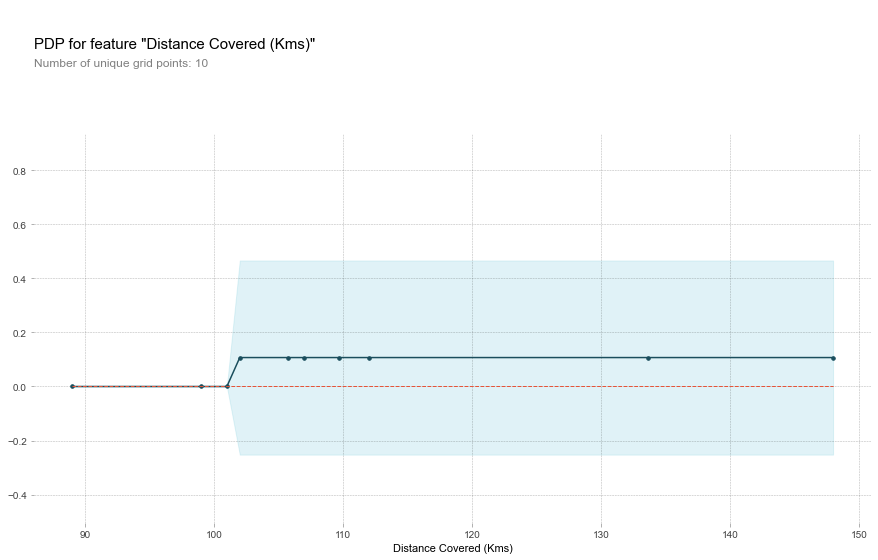

In [30]:
pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

We get this plot, this graph, demonstrating the following interesting aspect.
We see here the the threshold for the values which is close to hundred (100)
and two (2) kilometres.

So, players, for instance, who may have run in average a distance
of hundred (100) kilometres, are highly likely
to create an impact on the prediction of the Decision Tree classifier.
And, if they run more than, let's say, 130-140 kilometres,
it's highly unlikely, that they influence the
predictions of our model.

The same holds if they also run distances, which are, somewhere,
around 90 kilometres, and they are not expected to have any significant impact on the predictions
being made by our Decision Tree classifier.

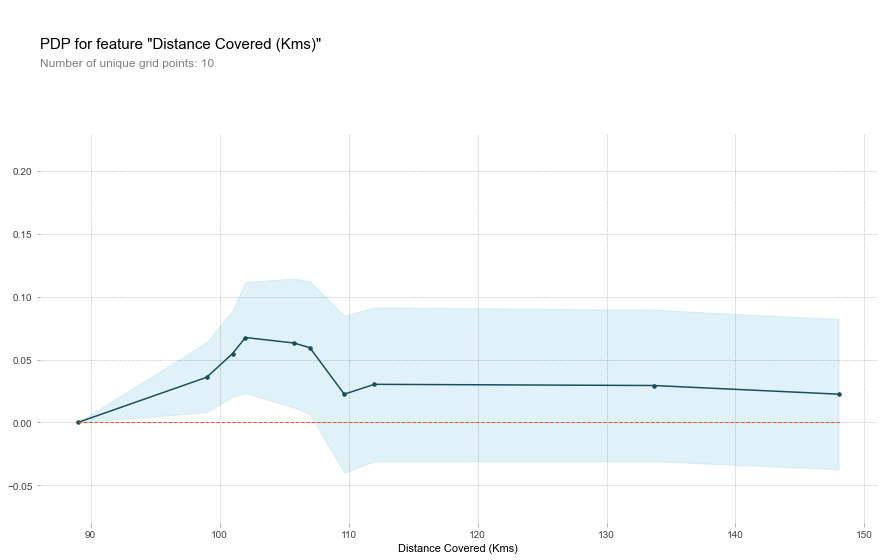

In [31]:
# Now let's try using the variable holding to random forest classfier.
# instead of tree_model, we'll use my_model.
pdp_dist = pdp.pdp_isolate(model=my_model, dataset=val_X,
                          model_features=feature_names,
                          feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

Now we have created a new plot, which is slightly
different from the one we received before.

And we can see here that, actually, still these most
significant values for the 'Distance Covered' are around hundred two (102).
However, there is another shape of the function
as you move from the left to the right in comparison
with what we created before.